In [3]:
# Importing the NumPy library, which is used for numerical computations in Python
import numpy as np
# Importing the Pandas library, which is used for data manipulation and analysis in Python
import pandas as pd


In [4]:
# Reading a CSV file from the specified path in Google Drive into a Pandas DataFrame
df=pd.read_csv('Obesity_data.csv')
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity_level
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,Male,19.684891,1.838441,85.312639,yes,yes,2.971588,3.000000,Sometimes,yes,2.975528,no,1.999773,0.965464,Sometimes,Public_Transportation,Overweight_Level_I
4995,4995,Male,16.000000,1.700000,71.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,yes,1.000000,2.000000,Sometimes,Public_Transportation,Overweight_Level_I
4996,4996,Male,19.000000,1.800000,85.000000,no,no,3.000000,3.000000,Frequently,no,3.000000,no,1.000000,0.000000,no,Public_Transportation,Overweight_Level_I
4997,4997,Male,19.946244,1.603435,45.000000,yes,yes,2.000000,3.000000,Frequently,no,2.487919,yes,1.230441,0.000000,no,Public_Transportation,Insufficient_Weight


In [5]:
# Calculating the number of unique values in each column of the DataFrame
df.nunique()

id                                           4999
Gender                                          2
Age                                          1120
Height                                       1266
Weight                                       1256
family_history_with_overweight                  2
frequent_consumption_of_high_caloric_food       2
frequency_of_consumption_of_vegetables        570
number_of_main_meals                          429
consumption_of_food_between_meals               4
SMOKE                                           2
consumption_of_water_daily                    969
calories_consumption_monitoring                 2
physical_activity_frequency                   879
time_using_technology_devices                 838
consumption_of_alcohol                          3
transportation_used                             5
obesity_level                                   7
dtype: int64

In [41]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight',
       'frequent_consumption_of_high_caloric_food',
       'frequency_of_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'SMOKE',
       'consumption_of_water_daily', 'calories_consumption_monitoring',
       'physical_activity_frequency', 'time_using_technology_devices',
       'consumption_of_alcohol', 'transportation_used', 'obesity_level'],
      dtype='object')

In [7]:
# Categorical variables
categoricals = [
    'Gender',
    'family_history_with_overweight',
    'frequent_consumption_of_high_caloric_food',
    'frequency_of_consumption_of_vegetables',
    'consumption_of_food_between_meals',
    'SMOKE',
    'calories_consumption_monitoring',
    'consumption_of_alcohol',
    'transportation_used'
]

# Numerical variables
numericals = [
    'id',
    'Age',
    'Height',
    'Weight',
    'number_of_main_meals',
    'consumption_of_water_daily',
    'physical_activity_frequency'
]

# Ignore variables (possibly IDs or irrelevant features)
ignore = ['0']

In [9]:
# Install PyCaret using pip package manager
!pip install pycaret

# Optionally, install PyCaret with all optional dependencies for full functionality
# pip install pycaret[full]

In [10]:
from pycaret.classification import *
# Import all classes and functions related to classification from PyCaret

In [ ]:
# Initialize a ClassificationExperiment object
exp = ClassificationExperiment()

# Setup the experiment with configuration parameters
exp.setup(
    df,  # DataFrame containing your data
    target='obesity_level',  # Target variable to predict
    session_id=555,  # Random seed for reproducibility
    train_size=0.7,  # Percentage of data to use for training
    preprocess=True,  # Enable data preprocessing

    # Feature types and handling
    categorical_features=categoricals,  # List of categorical features
    numeric_features=numericals,  # List of numeric features
    ignore_features=ignore,  # List of features to ignore
    numeric_imputation='mean',  # Imputation method for numeric features
    categorical_imputation='mode',  # Imputation method for categorical features
    normalize=True,  # Enable feature normalization
    normalize_method='zscore',  # Normalization method (Z-score normalization)
    remove_multicollinearity=True,  # Remove multicollinear features
    multicollinearity_threshold=0.95,  # Threshold for multicollinearity
    remove_outliers=True,  # Remove outliers from the data
    outliers_threshold=0.05,  # Threshold for outlier removal

    # Additional options
    ordinal_features=None,  # List of ordinal features
    date_features=None,  # List of date features
    polynomial_features=False,  # Generate polynomial features
    verbose=True,  # Print detailed logs during setup

    # Feature selection and imbalance handling
    feature_selection=False,  # Enable feature selection
    fix_imbalance=False,  # Handle class imbalance
    fix_imbalance_method=None,  # Method to fix class imbalance

    # Data splitting and cross-validation
    data_split_shuffle=True,  # Shuffle data before splitting
    data_split_stratify=False,  # Stratify data split based on target variable
    fold_strategy='kfold',  # Cross-validation strategy (k-fold)
    fold=10,  # Number of folds for cross-validation
    fold_shuffle=False,  # Shuffle folds in cross-validation
    fold_groups=None,  # Groups for fold assignments (e.g., for group k-fold)

    # Parallelization and hardware utilization
    n_jobs=-1,  # Number of parallel jobs (-1 uses all available cores)
    use_gpu=False,  # Use GPU for processing if available

    # Custom pipeline and output settings
    custom_pipeline=None,  # Custom pipeline for preprocessing
    html=True,  # Generate HTML reports (e.g., for profiling)
    log_experiment=False,  # Log experiment details
    experiment_name=None,  # Name of the experiment

    # Logging and visualization options
    log_plots=False,  # Log plots (e.g., feature importance)
    log_profile=False,  # Log data profile
    log_data=False,  # Log data details (e.g., data summary)

    # Profiling and additional options
    profile=False,  # Profile data to analyze its characteristics
    profile_kwargs=None  # Additional arguments for data profiling
)

,Description,Value
0,Session id,555
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 18)"
5,Transformed data shape,"(4824, 27)"
6,Transformed train set shape,"(3324, 27)"
7,Transformed test set shape,"(1500, 27)"
8,Ignore features,1
9,Numeric features,7


In [13]:
# Compare models using the ClassificationExperiment object 'exp'

top3_exp = exp.compare_models(
    include=None,               # List of models to include for comparison. If None, all models are used.
    exclude=None,               # List of models to exclude from comparison.
    fold=10,                    # Number of folds for cross-validation. Default is 10.
    round=4,                    # Number of decimal places to round the metric scores. Default is 4.
    sort='Accuracy',            # Metric to sort the models by. Default is 'Accuracy'.
    n_select=3,                 # Number of top models to return. Default is 1.
    budget_time=None,           # Maximum time to spend on training and comparing models. Default is None.
    turbo=True,                 # When True, uses a random subset of data for faster comparison. Default is True.
    errors='raise',             # How to handle errors during model training. Options are 'raise', 'ignore', 'log'.
    fit_kwargs=None,            # Dictionary of arguments to pass to the fit method of the models.
    engine=None,                # Specifies the engine to use for model comparison.
    verbose=True,               # When True, prints the progress of the comparison. Default is True.
    parallel=None               # Number of parallel jobs. Default is None (uses all available cores).
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8822,0.9864,0.8822,0.8839,0.8821,0.8617,0.8620,1.5180
lightgbm,Light Gradient Boosting Machine,0.8808,0.9862,0.8808,0.8828,0.8805,0.8600,0.8604,3.5120
gbc,Gradient Boosting Classifier,0.8765,0.0000,0.8765,0.8791,0.8763,0.8549,0.8554,6.9740
rf,Random Forest Classifier,0.8708,0.9847,0.8708,0.8733,0.8693,0.8482,0.8490,1.1370
lr,Logistic Regression,0.8314,0.0000,0.8314,0.8313,0.8291,0.8019,0.8026,1.2700
dt,Decision Tree Classifier,0.8251,0.8990,0.8251,0.8272,0.8250,0.7946,0.7950,0.6310
et,Extra Trees Classifier,0.8234,0.9751,0.8234,0.8255,0.8217,0.7925,0.7934,1.1580
lda,Linear Discriminant Analysis,0.8034,0.0000,0.8034,0.8034,0.8015,0.7691,0.7697,0.5940
svm,SVM - Linear Kernel,0.6805,0.0000,0.6805,0.6904,0.6757,0.6251,0.6290,0.5780
knn,K Neighbors Classifier,0.6699,0.8861,0.6699,0.6665,0.6615,0.6118,0.6139,0.6960


In [14]:
top3_exp

[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, objective='multi:softprob', ...),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min

In [15]:
# Create a model using XGBoost algorithm with optimization based on 'Accuracy'
model=exp.create_model('xgboost',optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8629,0.9833,0.8629,0.8605,0.8609,0.8385,0.8387
1,0.8771,0.9880,0.8771,0.8798,0.8768,0.8560,0.8565
2,0.8829,0.9876,0.8829,0.8866,0.8836,0.8626,0.8630
3,0.8686,0.9841,0.8686,0.8697,0.8684,0.8462,0.8465
4,0.9086,0.9834,0.9086,0.9074,0.9073,0.8928,0.8930
5,0.8800,0.9867,0.8800,0.8806,0.8798,0.8593,0.8594
6,0.8714,0.9855,0.8714,0.8737,0.8722,0.8487,0.8488
7,0.8971,0.9909,0.8971,0.9030,0.8976,0.8790,0.8798
8,0.9114,0.9915,0.9114,0.9125,0.9117,0.8962,0.8963


In [16]:
# Tune the XGBoost model to optimize 'Accuracy' metric

tuned_xgboost = exp.tune_model(
    model,              # Model to tune, created previously using exp.create_model()
    optimize='Accuracy',    # Metric to optimize during tuning
    n_iter=10,          # Number of iterations for hyperparameter search
    custom_grid=None,   # Custom grid of hyperparameters to search over (None uses default)
    custom_scorer=None, # Custom scoring function for evaluation (None uses default)
    verbose=True        # Print detailed logs during tuning process
)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:53:05
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8857,0.9854,0.8857,0.8847,0.8838,0.8654,0.8658
1,0.9000,0.9888,0.9000,0.9001,0.8995,0.8826,0.8828
2,0.8857,0.9902,0.8857,0.8913,0.8863,0.8659,0.8667
3,0.8857,0.9871,0.8857,0.8873,0.8857,0.8662,0.8665
4,0.9114,0.9856,0.9114,0.9139,0.9106,0.8962,0.8968
5,0.8914,0.9902,0.8914,0.8918,0.8913,0.8727,0.8728
6,0.8971,0.9876,0.8971,0.9001,0.8982,0.8790,0.8791
7,0.8886,0.9909,0.8886,0.8918,0.8880,0.8689,0.8696
8,0.9143,0.9924,0.9143,0.9159,0.9142,0.8996,0.8999


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
tuned_xgboost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
# Finalize the tuned XGBoost model using the ClassificationExperiment object 'exp'
# Handle potential row drops in transformations consistently

final_model = exp.finalize_model(
    tuned_xgboost,  # Tuned XGBoost model to finalize
    fit_kwargs=None,  # Additional arguments for the fit method of the model (None uses default).
    groups=None  # Group labels for group-wise cross-validation (None indicates no groups).
)

# Check if any rows were dropped during preprocessing
if exp.get_config('X_train').shape[0] != exp.get_config('y_train').shape[0]:
    print("Warning: Rows were dropped during preprocessing. Adjust transformations for consistency.")
    # Investigate which transformations might be causing row drops and adjust them to handle missing values or filter rows consistently across all columns.

In [20]:
# Convert 'obesity_level' column to binary indicator
# Assuming 'Obesity' is the positive class and other classes are negative

df['obesity_level'] = (df['obesity_level'] == 'Obesity').astype(int)

# Explanation:
# - The expression `(df['obesity_level'] == 'Obesity')` creates a boolean mask where 'Obesity' class is True and others are False.
# - `.astype(int)` converts True/False values to 1/0, effectively converting the column to binary format.
# - This operation assumes that 'Obesity' is the positive class that you want to predict with a binary indicator (1 for Obesity, 0 for others).



In [21]:
# Evaluate the tuned XGBoost model using the ClassificationExperiment object 'exp'

eval_model = exp.evaluate_model(
    tuned_xgboost,      # Tuned XGBoost model to evaluate
    fold=None,          # Number of folds for cross-validation. None uses default (typically 10).
    fit_kwargs=None,    # Additional arguments for the fit method of the model (None uses default).
    plot_kwargs=None    # Additional arguments for plotting functions (None uses default).
)

# Explanation:
# - 'tuned_xgboost' is the model object returned by exp.tune_model() or exp.create_model().
# - exp.evaluate_model() evaluates the model's performance using various metrics and visualizations.
# - 'eval_model' stores the evaluation results and plots generated during the evaluation process.


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
# Finalize the tuned XGBoost model using the ClassificationExperiment object 'exp'

final_model = exp.finalize_model(
    tuned_xgboost,  # Tuned XGBoost model to finalize
    fit_kwargs=None,  # Additional arguments for the fit method of the model (None uses default).
    groups=None  # Group labels for group-wise cross-validation (None indicates no groups).
)

# Explanation:
# - 'tuned_xgboost' is the model object returned by exp.tune_model() or exp.create_model().
# - exp.finalize_model() finalizes the model for deployment or further use after tuning and evaluation.
# - 'final_model' stores the finalized model object ready for deployment or prediction.



In [23]:
# Make predictions using the finalized model 'final_model' within the ClassificationExperiment object 'exp'

prediction = exp.predict_model(
    final_model,               # Finalized model to use for predictions
    data=None,                 # New data to make predictions on. Replace with actual new data if available.
    probability_threshold=None, # Threshold for converting probability predictions to class labels. None uses default.
    encoded_labels=True,       # Whether the target labels are encoded (True) or not (False).
    raw_score=True,            # Whether to include raw scores in the prediction output (True) or not (False).
    round=4,                   # Number of decimal places to round the prediction probabilities.
    verbose=True               # Whether to print progress and logs during prediction (True) or not (False).
)

# Explanation:
# - 'final_model' is the finalized model object returned by exp.finalize_model().
# - exp.predict_model() makes predictions using 'final_model' on new data (specified in 'data').
# - 'prediction' stores the predicted labels, probabilities, and other relevant information based on the model's output.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8633,0.9911,0.8633,0.8785,0.8601,0.8404,0.8436


In [24]:
# Save the finalized model 'final_model' as a .pkl file using the ClassificationExperiment object 'exp'

saved = exp.save_model(
    final_model,          # Finalized model object to save
    model_name="final_model.pkl",  # Name of the file to save the model as
    model_only=True,      # Whether to save only the model object (True) or everything related to the experiment (False)
    verbose=True          # Whether to print progress and logs during saving (True) or not (False)
)

# Explanation:
# - 'final_model' is the finalized model object returned by exp.finalize_model().
# - exp.save_model() saves the 'final_model' to a file named "final_model.pkl".
# - 'saved' stores information about the saving process, confirming if the operation was successful.


Model Successfully Saved


In [25]:
# Load a saved model from a .pkl file

loaded_model = load_model("final_model.pkl", verbose=True)

# Explanation:
# - load_model() is a function from PyCaret used to load a saved model from a file.
# - "final_model.pkl" is the filename (and possibly the path) of the saved model you want to load.
# - verbose=True enables printing of progress and logs during the loading process.

# 'loaded_model' now contains the model object loaded from "final_model.pkl".



Transformation Pipeline and Model Successfully Loaded


In [27]:
prediction.to_csv('preprocessed_data.csv',index=False)

In [28]:
df1=pd.read_csv('test_modified.csv')
df1

,id,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
0,4999,Female,31.274628,1.670000,71.602622,yes,yes,2.843709,1.599464,Sometimes,no,2.663861,no,1.682271,0.160138,Sometimes,Automobile
1,5000,Female,18.947102,1.647811,85.079589,yes,yes,2.911749,3.000000,Sometimes,no,2.000000,no,1.000000,1.551934,no,Public_Transportation
2,5001,Female,37.524551,1.548178,80.000000,yes,yes,2.000000,1.317884,Sometimes,no,1.591597,no,1.000000,0.000000,no,Automobile
3,5002,Male,20.000000,1.770000,70.000000,yes,yes,2.000000,3.000000,no,no,2.000000,no,1.000000,1.000000,no,Public_Transportation
4,5003,Male,34.389679,1.733875,84.557797,yes,yes,2.982261,2.832018,Sometimes,no,2.299878,no,0.668963,0.890213,no,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,5017,Male,19.000000,1.700000,85.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,no,Public_Transportation
5013,5018,Female,22.998709,1.583943,44.316254,no,no,3.000000,3.000000,Frequently,no,2.316069,yes,1.392406,0.000000,no,Public_Transportation
5014,5019,Female,21.000000,1.590000,50.000000,no,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
5015,5020,Male,23.000000,1.800000,97.000000,yes,no,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,1.000000,no,Walking


In [29]:
df1.drop_duplicates(inplace=True)
df1

,id,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
0,4999,Female,31.274628,1.670000,71.602622,yes,yes,2.843709,1.599464,Sometimes,no,2.663861,no,1.682271,0.160138,Sometimes,Automobile
1,5000,Female,18.947102,1.647811,85.079589,yes,yes,2.911749,3.000000,Sometimes,no,2.000000,no,1.000000,1.551934,no,Public_Transportation
2,5001,Female,37.524551,1.548178,80.000000,yes,yes,2.000000,1.317884,Sometimes,no,1.591597,no,1.000000,0.000000,no,Automobile
3,5002,Male,20.000000,1.770000,70.000000,yes,yes,2.000000,3.000000,no,no,2.000000,no,1.000000,1.000000,no,Public_Transportation
4,5003,Male,34.389679,1.733875,84.557797,yes,yes,2.982261,2.832018,Sometimes,no,2.299878,no,0.668963,0.890213,no,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9994,Male,18.000000,1.750000,86.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation
4996,9995,Male,23.096353,1.819867,105.428628,yes,yes,2.000000,3.000000,Sometimes,no,2.745242,no,0.069238,0.069367,Sometimes,Public_Transportation
4997,9996,Male,22.884722,1.806947,105.696358,yes,yes,2.044326,3.000000,Sometimes,no,2.358180,no,0.000000,0.335158,Sometimes,Public_Transportation
4998,9997,Male,18.000000,1.680000,68.000000,no,yes,1.000000,3.000000,Sometimes,no,2.000000,no,3.000000,1.000000,Sometimes,Public_Transportation


In [30]:
mask = df1.isna().any(axis = 1) | (df == " ").any(axis = 1)

if mask.any().any():
  print(df1[mask])
else:
  print("No Empty Values")

        id  Gender   Age  Height  Weight family_history_with_overweight  \
4979  9978    Male  23.0    1.77   105.0                            yes   
4981  9980  Female  21.0    1.59    60.0                            yes   

     frequent_consumption_of_high_caloric_food  \
4979                                       yes   
4981                                       yes   

      frequency_of_consumption_of_vegetables  number_of_main_meals  \
4979                                     2.0                   3.0   
4981                                     2.0                   1.0   

     consumption_of_food_between_meals SMOKE  consumption_of_water_daily  \
4979                               NaN    no                         3.0   
4981                         Sometimes    no                         NaN   

     calories_consumption_monitoring  physical_activity_frequency  \
4979                              no                          3.0   
4981                              no         

In [31]:
df1.loc[4979, 'consumption_of_food_between_meals'] = df1['consumption_of_food_between_meals'].mode().iloc[0]
df1.loc[4981, 'consumption_of_water_daily'] = df1['consumption_of_water_daily'].mean()
df1

,id,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
0,4999,Female,31.274628,1.670000,71.602622,yes,yes,2.843709,1.599464,Sometimes,no,2.663861,no,1.682271,0.160138,Sometimes,Automobile
1,5000,Female,18.947102,1.647811,85.079589,yes,yes,2.911749,3.000000,Sometimes,no,2.000000,no,1.000000,1.551934,no,Public_Transportation
2,5001,Female,37.524551,1.548178,80.000000,yes,yes,2.000000,1.317884,Sometimes,no,1.591597,no,1.000000,0.000000,no,Automobile
3,5002,Male,20.000000,1.770000,70.000000,yes,yes,2.000000,3.000000,no,no,2.000000,no,1.000000,1.000000,no,Public_Transportation
4,5003,Male,34.389679,1.733875,84.557797,yes,yes,2.982261,2.832018,Sometimes,no,2.299878,no,0.668963,0.890213,no,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9994,Male,18.000000,1.750000,86.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation
4996,9995,Male,23.096353,1.819867,105.428628,yes,yes,2.000000,3.000000,Sometimes,no,2.745242,no,0.069238,0.069367,Sometimes,Public_Transportation
4997,9996,Male,22.884722,1.806947,105.696358,yes,yes,2.044326,3.000000,Sometimes,no,2.358180,no,0.000000,0.335158,Sometimes,Public_Transportation
4998,9997,Male,18.000000,1.680000,68.000000,no,yes,1.000000,3.000000,Sometimes,no,2.000000,no,3.000000,1.000000,Sometimes,Public_Transportation


In [32]:
mask = df1.isna().any(axis = 1) | (df == " ").any(axis = 1)

if mask.any().any():
  print(df1[mask])
else:
  print("No Empty Values")

No Empty Values


In [33]:
predictions = predict_model(loaded_model, data=df1)
predictions

,id,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,prediction_label,prediction_score
0,4999,Female,31.274628,1.670000,71.602623,yes,yes,2.843709,1.599464,Sometimes,no,2.663861,no,1.682271,0.160138,Sometimes,Automobile,Overweight_Level_I,0.9203
1,5000,Female,18.947102,1.647811,85.079590,yes,yes,2.911749,3.000000,Sometimes,no,2.000000,no,1.000000,1.551934,no,Public_Transportation,Obesity_Type_I,0.9717
2,5001,Female,37.524551,1.548178,80.000000,yes,yes,2.000000,1.317884,Sometimes,no,1.591597,no,1.000000,0.000000,no,Automobile,Obesity_Type_I,0.9097
3,5002,Male,20.000000,1.770000,70.000000,yes,yes,2.000000,3.000000,no,no,2.000000,no,1.000000,1.000000,no,Public_Transportation,Normal_Weight,0.9776
4,5003,Male,34.389679,1.733875,84.557800,yes,yes,2.982261,2.832018,Sometimes,no,2.299878,no,0.668963,0.890213,no,Automobile,Overweight_Level_II,0.8881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9994,Male,18.000000,1.750000,86.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,0.6936
4996,9995,Male,23.096354,1.819867,105.428627,yes,yes,2.000000,3.000000,Sometimes,no,2.745242,no,0.069238,0.069367,Sometimes,Public_Transportation,Obesity_Type_I,0.9798
4997,9996,Male,22.884722,1.806947,105.696358,yes,yes,2.044326,3.000000,Sometimes,no,2.358180,no,0.000000,0.335158,Sometimes,Public_Transportation,Obesity_Type_I,0.9881
4998,9997,Male,18.000000,1.680000,68.000000,no,yes,1.000000,3.000000,Sometimes,no,2.000000,no,3.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,0.9417


In [35]:
predictions.to_csv('test_predictions(Milestone 2 Week 4).csv',index=True)

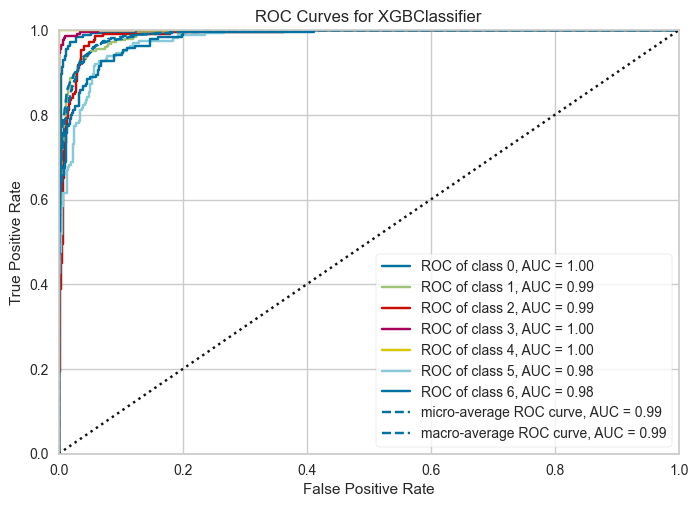

In [36]:
exp.plot_model(loaded_model, plot='auc')  # AUC plot


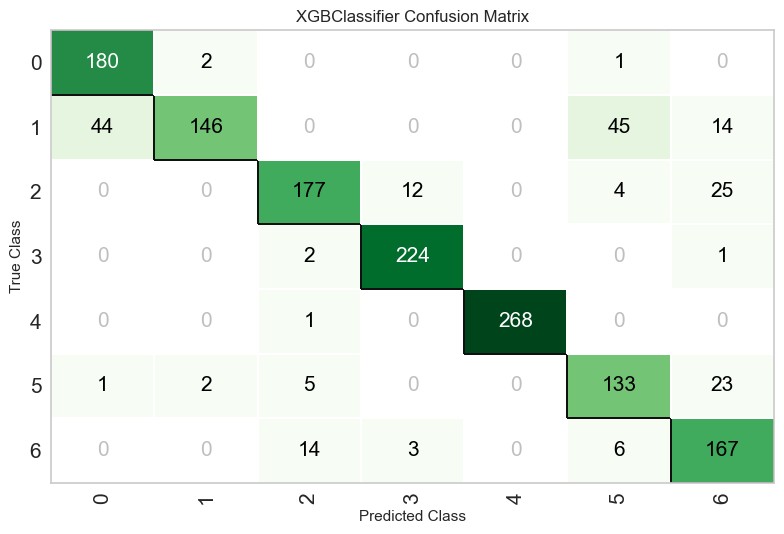

In [37]:

exp.plot_model(loaded_model, plot='confusion_matrix')  # Confusion matrix


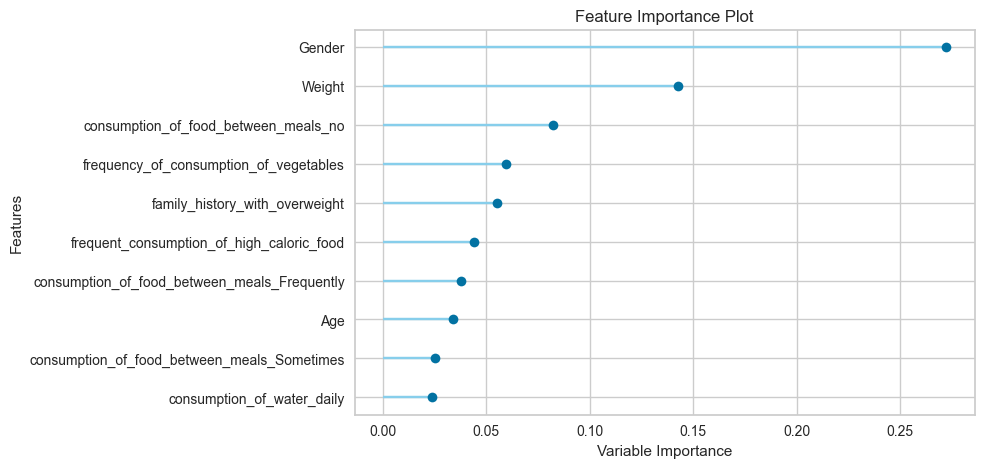

In [38]:
exp.plot_model(loaded_model, plot='feature')  # Feature importance


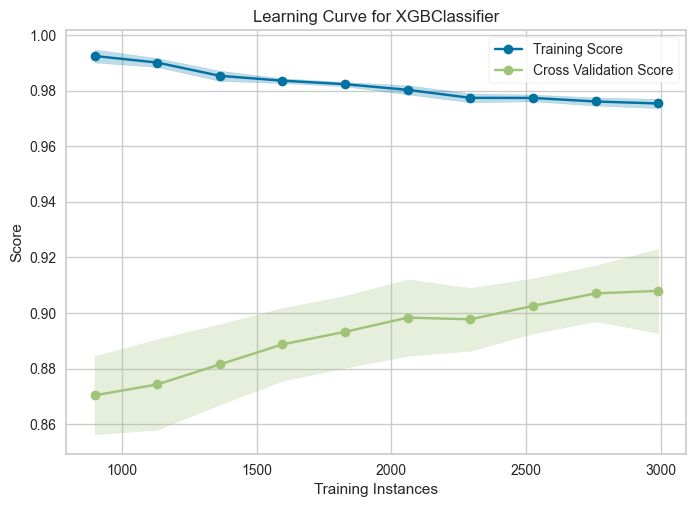

In [39]:
exp.plot_model(loaded_model, plot='learning')  # Learning curve


In [40]:
predictions.to_csv

<bound method NDFrame.to_csv of         id  Gender        Age    Height      Weight  \
0     4999  Female  31.274628  1.670000   71.602623   
1     5000  Female  18.947102  1.647811   85.079590   
2     5001  Female  37.524551  1.548178   80.000000   
3     5002    Male  20.000000  1.770000   70.000000   
4     5003    Male  34.389679  1.733875   84.557800   
...    ...     ...        ...       ...         ...   
4995  9994    Male  18.000000  1.750000   86.000000   
4996  9995    Male  23.096354  1.819867  105.428627   
4997  9996    Male  22.884722  1.806947  105.696358   
4998  9997    Male  18.000000  1.680000   68.000000   
4999  9998    Male  25.920738  1.823755  118.669907   

     family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                               yes                                       yes   
1                               yes                                       yes   
2                               yes                             